In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
from tqdm import tqdm_notebook as tqdm

from data import cities, prime_cities, prime_set
from metrics import metric

from random import sample
from time import time
from scipy.spatial import cKDTree as KDTree
from collections import deque
from multiprocessing import Pool, cpu_count

In [2]:
jtplot.style(figsize=(24, 15))
N = len(cities)

[]

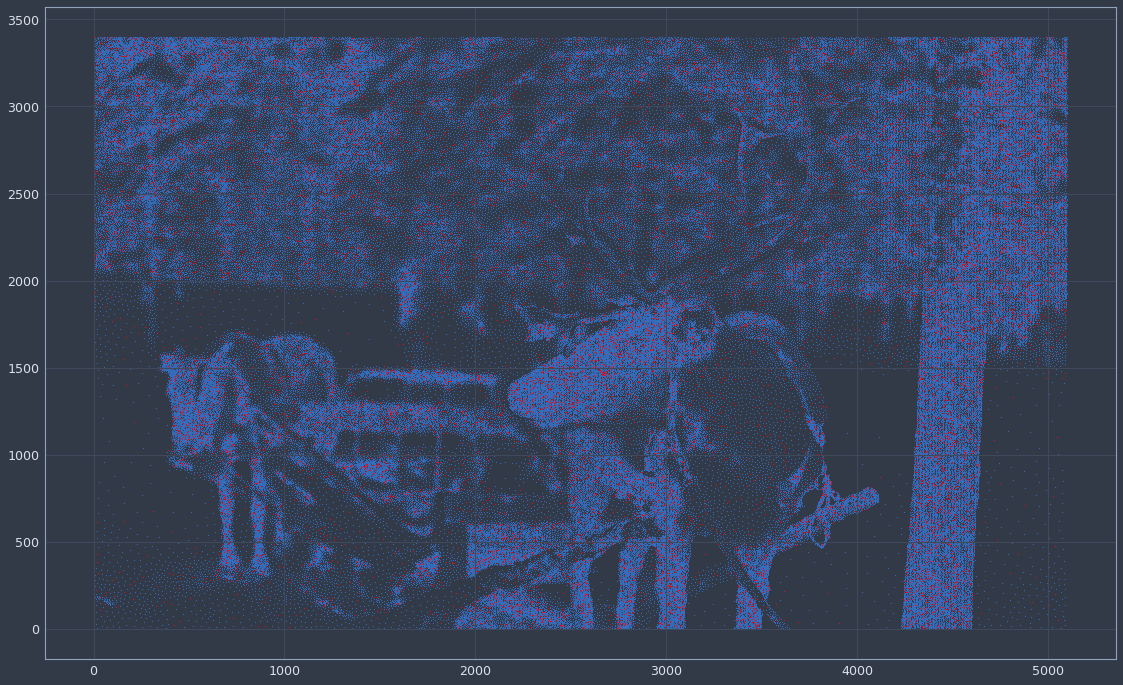

In [3]:
plt.scatter(cities[:,0], cities[:,1], s=1)
plt.scatter(cities[prime_cities,0], cities[prime_cities,1], s=1, c="red")
plt.plot()

In [4]:
def mutate(path):
    path = path.copy()
    i, j = sample(range(len(path)), 2)
    path[i], path[j] = path[j], path[i]
    return path

In [8]:
t0 = time()

unvisited = np.array(range(1, N))
greedy_path = [0]
node = 0
while unvisited:
    if len(unvisited) % 10000 == 0:
        print(f"\t{len(unvisited)} cities remaining, {time()-t0}s elapsed")
    dists = la.norm(cities[unvisited]-cities[node], axis=1)
    node = unvisited[np.argmin(dists, axis=0)]
    greedy_path.append(node)
    unvisited = np.setdiff1d(unvisited, np.array([node]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()